In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dropout,Dense,MaxPooling2D,Conv2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_dir = (r"C:\Users\HP\Downloads\archive (12)\CleandMRIImageData\Training")
test_dir = (r"C:\Users\HP\Downloads\archive (12)\CleandMRIImageData\Testing")

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,rotation_range=20,zoom_range=0.2,horizontal_flip=True
)

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_gen = train_datagen.flow_from_directory(
    train_dir,target_size=(224,224),batch_size=32,class_mode="categorical"
)

Found 5712 images belonging to 4 classes.


In [11]:
test_gen = test_datagen.flow_from_directory(
    test_dir,target_size=(224,224),batch_size=32,class_mode="categorical"
)

Found 1311 images belonging to 4 classes.


In [24]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D((2,2)))

In [25]:
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

In [26]:
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))

In [32]:
model.add(Dense(4,activation="softmax"))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │           3,870 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │             124 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,172,954 (42.62 MB)

 Trainable params: 11,172,954 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [34]:
history = model.fit(train_gen,validation_data=test_gen,epochs=10)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 526s 3s/step - accuracy: 0.2346 - loss: 1.4118 - val_accuracy: 0.3089 - val_loss: 1.3829
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 460s 3s/step - accuracy: 0.2763 - loss: 1.3870 - val_accuracy: 0.3089 - val_loss: 1.3797
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 431s 2s/step - accuracy: 0.2736 - loss: 1.3850 - val_accuracy: 0.3089 - val_loss: 1.3798
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.2789 - loss: 1.3835 - val_accuracy: 0.3089 - val_loss: 1.3803
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 402s 2s/step - accuracy: 0.2836 - loss: 1.3821 - val_accuracy: 0.3089 - val_loss: 1.3805
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.2942 - loss: 1.3813 - val_accuracy: 0.3089 - val_loss: 1.3807
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.2770 - loss: 1.3840 - val_accuracy: 0.3089 - val_loss: 1.3802
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 0.2876 - loss: 1.3825 - val_accu

In [35]:
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs,axis=1)
y_true = test_gen.classes

41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 439ms/step


In [36]:
print("predicted label",y_pred[:10])
print("true label",y_pred[:10])  # y_true ayga

predicted label [2 2 2 2 2 2 2 2 2 2]
true label [2 2 2 2 2 2 2 2 2 2]


In [37]:
test_loss,test_acc = model.evaluate(test_gen,verbose=2)
print(f"test_accuracy {test_acc*100:.2f}%")

41/41 - 18s - 441ms/step - accuracy: 0.3089 - loss: 1.3801
test_accuracy 30.89%


In [38]:
import matplotlib.pyplot as plt

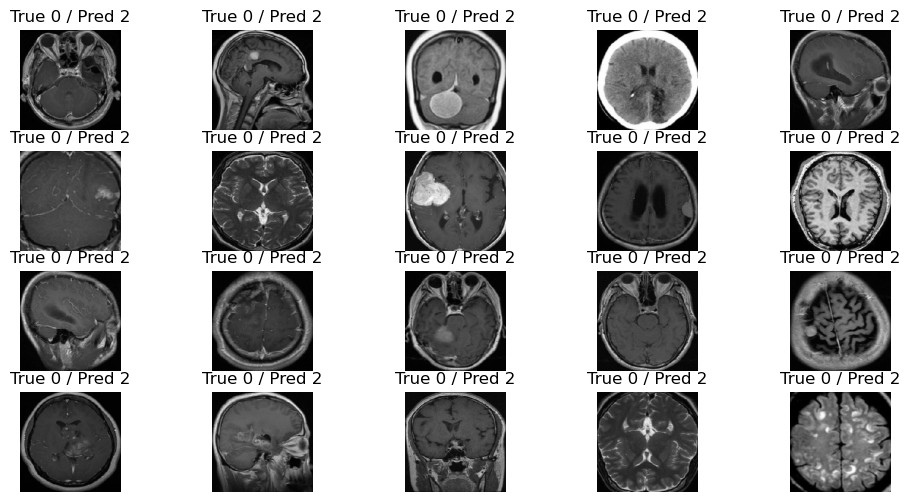

In [40]:
batch_image , batch_labels = next(test_gen)
plt.figure(figsize=(12,6))

for i in range(min(20,len(batch_image))):
    plt.subplot(4,5,i+1)
    image = batch_image[i]
    plt.imshow(image)
    plt.title(f"True {y_true[i]} / Pred {y_pred[i]}")
    plt.axis("off")

plt.show()

In [2]:
# model.save("brain_tumor_model.h5")  # Save trained model
